Exploring the (lack of) poly-A tails of human RNA

[FASTA File](http://hgdownload.cse.ucsc.edu/goldenPath/hg38/bigZips/mrna.fa.gz)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pysam import FastaFile as fasta

# Returns a DataFrame with length and adenylation of RNA as columns
# Each row is an RNA sample in the FAST file
def fasta_adenylation(path):
    ff = fasta(path)
    data = {}
    for ref in ff.references:
        rna = ff.fetch(ref)
        index = -1
        while(rna[index] == 'a'):
            index = index -1
        adenylation = index * -1 - 1
        data[ref] = {"length": len(rna), "adenylation": adenylation}
    return pd.DataFrame.from_dict(data, orient="index")


In [2]:
df = fasta_adenylation("data/mrna.fa")
df.head(10)

,length,adenylation
A00118,135,2
A00119,135,0
A00127,2368,1
A00129,252,9
A00149,567,0
A00209,641,0
A00469,814,16
A00501,556,0
A01046,1367,0
A02076,977,0


In [3]:
df.describe()

,length,adenylation
count,2.683747e+06,2.683747e+06
mean,2.054898e+02,1.215645e+00
std,6.991804e+02,5.291671e+00
min,2.000000e+00,0.000000e+00
25%,1.900000e+01,0.000000e+00
50%,1.900000e+01,0.000000e+00
75%,3.200000e+01,1.000000e+00
max,2.050120e+05,2.160000e+02


<IPython.core.display.Javascript object>


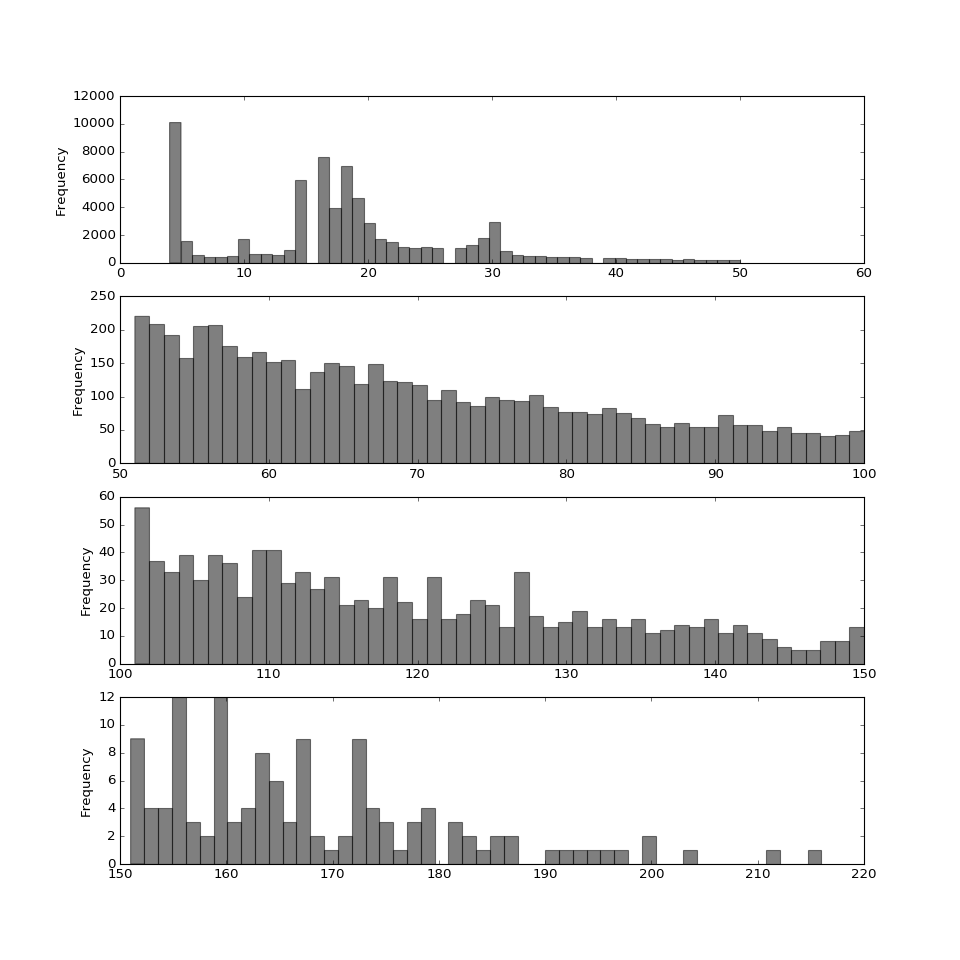

In [8]:
%matplotlib notebook

df_small = df[(df.adenylation > 3) & (df.adenylation <= 50)]
df_med = df[(df.adenylation > 50) & (df.adenylation <= 100)]
df_large = df[(df.adenylation > 100) & (df.adenylation <= 150)]
df_xlarge = df[(df.adenylation > 150)]

plt.rcParams["figure.figsize"] = (12, 12)
for idx, df_sub in enumerate([df_small, df_med, df_large, df_xlarge]):
    plt.subplot(4, 1, idx+1)
    df_sub["adenylation"].plot.hist(bins=50, color='k', alpha=0.5)
    
plt.show()

Most of the RNA didn't have poly-A tails

In [5]:
df[(df.adenylation == 0)].describe()

,length,adenylation
count,1.592318e+06,1592318.0
mean,1.944552e+02,0.0
std,6.548029e+02,0.0
min,2.000000e+00,0.0
25%,1.900000e+01,0.0
50%,1.900000e+01,0.0
75%,3.200000e+01,0.0
max,7.447400e+04,0.0


<IPython.core.display.Javascript object>


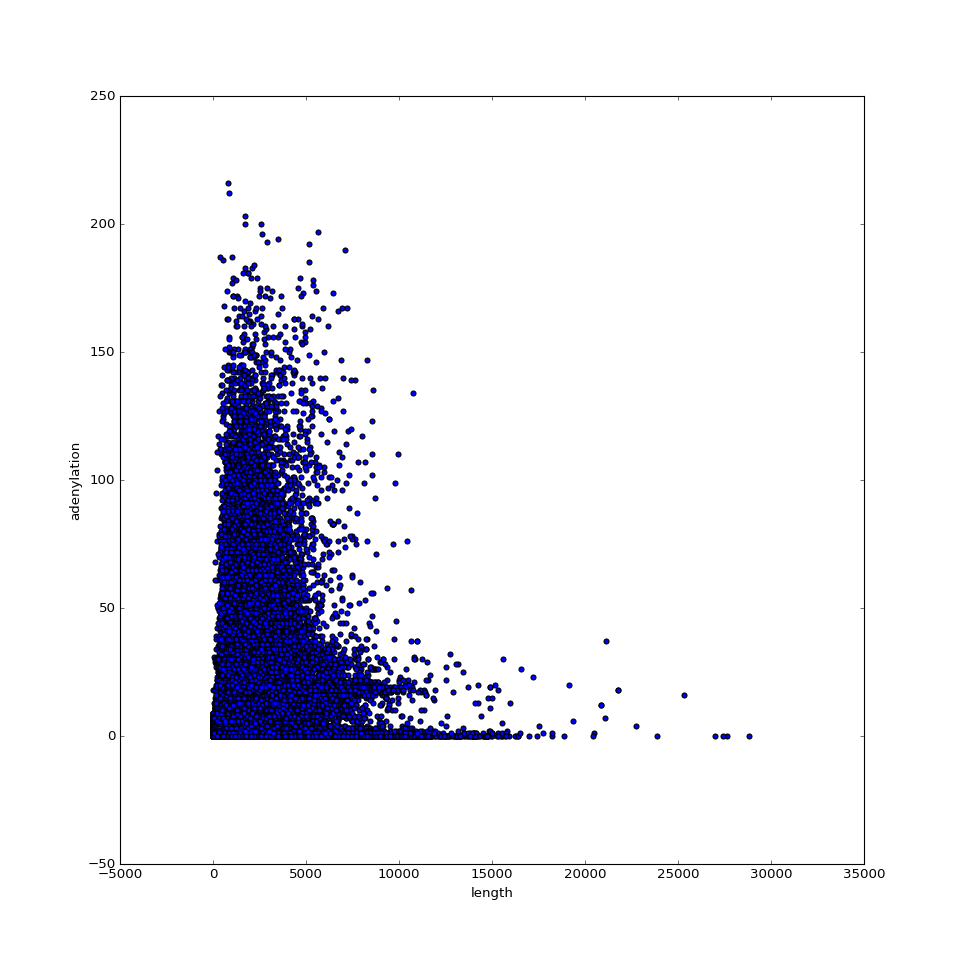

In [14]:
%matplotlib notebook
# Ignore the few outliers past 60k
df[(df.length > 0) & (df.length < 30000)].plot.scatter(x='length', y='adenylation')

In [13]:
# List our outliers past 30K in length
df[(df.length >= 30000)]

,length,adenylation
AF414442,66765,15
CS329402,49020,0
GQ497714,54690,0
JB406694,74474,0
JB406696,39731,2
JX088243,205012,2
X90568,81940,10
